<h1><center>Titanic: A complete project from scratch: Data analysis, visualization, and modeling</center></h1>
<center><img src="https://www.rd.com/wp-content/uploads/2019/08/auction-of-titanic-travel-brochures-wiltshire-uk-apr-2017-e1567006087133-760x506.jpg"></center>


In [ ]:
#출처: https://www.kaggle.com/jieun0441/titanic-a-complete-project-from-scratch-data-ana/edit

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

    
    
* [Problem Description](#1)
* [Explanatory Data Analysis (EDA)](#2)
    - [New feature (Title)](#21)
    - [Missing Values](#22)
        - [Cabin](#221)
        - [Embarked and Fare](#222)
        - [Age](#223)
    - [Exploring features](#23)
        - [Sex](#231)
        - [Ticket class (Pclass)](#232)
        - [Number of Siblings/Spouses](#233)
        - [Number of Parents/Children](#234)
        - [Embarked](#235)
        - [Fare](#236)
        - [Ticket, Name, PassengerID](#237)
* [Training](#3)
    - [Defining our classifiers](#31)
        - [Logistic Regression (from scratch)](#311)
        - [Least Square Ridge Classifier (from scratch)](#312)
        - [Preprocess](#313)
        - [Train and validate (KFold)](#314)
    - [Scikit-learn models](#32)
        - [Hyperparameter tuning](#321)
        - [Random Forest Classifier](#322)
        - [Logistic Regression Classifier](#323)
        - [XGBoost Classifier](#324)
    - [Deep Neural Network with Keras](#33)
    - [Voting Classifier](#34)
* [Summary](#4)


<a id="1"></a>

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center>Problem Description</center></h2>
    
이 프로젝트는 승객들의 연령, 성별, 생존여부와 같은 승객 정보들이 있다. 데이터셋은 정수형도 있고, 실수형, 범주형, 문자형 등 여러 유형의 변수들이 있다. 그리고 결측치도 존재한다.
탐색적 분석(EDA)와 시각화를 위해 pandas, numpy, matplotlib, seaborn을 활용하고,
로지스틱 회귀분석과 최소제곱 릿지 분류를 밑바닥부터 수행함으로써 생존여부를 예측해볼 것이다.

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center>Explanatory Data Analysis (EDA)</center></h2>

이 섹션에서는 먼저 훈련 데이터와 테스트 데이터를 병합하여 전체 데이터 세트를 표시합니다. 아래 표에는 데이터에 대한 일부 정보 및 통계와 함께 전체 데이터 요약이 표시됩니다. 예를 들어 승객의 최소 연령은 0.17 (8 주)이었습니다. (Elizabeth Gladys 'Millvina'Dean은 모든 승객들 (97 세) 중 마지막으로 사망 한 사람은 타이타닉의 최연소 생존자였습니다. 

가장 비싼 티켓은 512 파운드였습니다! James Warburton 부인이 구입했습니다. Martinez Cardeza (Charlotte Wardle Drake)는 B51, B53, B55의 3 개 객실을 예약했습니다. 그녀가 3 개의 좌석을 예약 한 이유는 무엇입니까? 잠깐, 객실 번호와 요금이 같은 다른 사람이 있습니다. Thomas Drake Martinez Cardeza parch 변수는 같이 승선한 부모나 자녀들의 수를 의미하는데, 이 parch 값이 둘 다 1명이고 토마스의 나이는 샬롯보다 작기 때문에 토마스가 그녀의 아들이라고 말할 수 있습니다. 같은 요금을 지불 한 다른 사람이 있는데, 그 사람은 그들의 하인 Miss Anna ward 였습니다.

어쨌든 아래 그림에서 각 기능의 누락 된 값을 볼 수 있습니다. 예를 들어 cabin 피처에 많은 결측값이 있음을 알 수 있습니다. 예를 들어, Miss Anna Ward의 cabin 값이 누락되었지만 우리는 이제 그것이 B51, B53, B55가 되어야 함을 알 수 있습니다.

그림 아래에서 각 특성의 결측값 수를 볼 수도 있습니다.

In [3]:
# Importing useful libararies

import warnings
warnings.filterwarnings("ignore")

import numpy as np  
import pandas as pd    
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from time import time

Titanic Dataset Summary:


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Stats of some features:


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


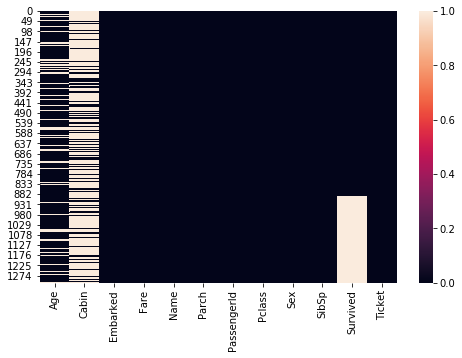

Number of missing values in 1309 examples


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [4]:
#데이터 각각 불러오기
df_train = pd.read_csv("D:/data_for_MachineLearning/titanic_캐글/train.csv")     #Loading train data
df_test = pd.read_csv("D:/data_for_MachineLearning/titanic_캐글/test.csv")      #Loading test data
df_sample_sub = pd.read_csv("D:/data_for_MachineLearning/titanic_캐글/gender_submission.csv")  #Loading sample submission data

# train 데이터에 test 데이터 붙여서 df_all로 만들기
df_all = df_train.append(df_test, ignore_index=True)     # Merging df_train and df_test dataframes

# df_all 전체 데이터의 데이터셋 살펴보기
print("Titanic Dataset Summary:")
display(df_all.head())

# df_all 전체 데이터의 통계량 요약
print("Stats of some features:")
display(df_all.describe())

# 데이터 형식 보기
print(df_all.info())

# 결측값 히트맵 그림 보기 - 이를 통해 Age와 Cabin변수에 결측치가 있는 걸 볼 수 있다.
plt.figure(figsize=(8,5))
sns.heatmap(df_all.isnull())                     # Heatmap of missing values
plt.show()

m = df_all.shape[0]
print('Number of missing values in',m, 'examples')
display(df_all.isnull().sum())           # Number of missing values


In [33]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


Survival은 test데이터값이 없어서 결측치로 처리되어 있는 점을 유의해야 한다.

<a id="21"></a>

## 새 피쳐 (Title)

이름 변수는 무시해야 할까? 그렇지 않다.
우리는 호칭을 추출해서 6개의 카테고리로 만들 수 있다.(Mr, Master, Miss, Mrs, Officer and Royalty)
예를 들어, Sir, Don, Lady 같은 호칭이 붙은 사람은 왕족(royalty)로 볼 수 있다.
각 카테고리에 몇명이 들어가는지 보자. 

<a href="https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9">

In [5]:
# 이름 피쳐로부터 호칭을 추출해서 새로운 피쳐(Title) 만들기

df_all['Title'] = df_all.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
 # apply와 lambda 활용 관련 글 - https://data-newbie.tistory.com/207
    
display(df_all.Title)
new_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

df_all.Title = df_all.Title.map(new_titles)
display(df_all.Title.value_counts())


0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

<a id="22"></a>

## 결측치 처리

아까 age 변수에서는 263개, cabin에서는 1014개, embarked에서 2개, fare에서 1개의 결측치가 있음을 확인했다.
이제 이 결측치들을 어떻게 처리하는지 보자.
<a id="221"></a>
### Cabin
cabin 수치가 중요할까? 그럴 수도 있다.
cabin 값이 데크의 위치를 알려주고, 더 높은 데크일수록 구명보트와 가까울 거라는 예상을 하는 사람들도 있다.
그러나 우리는 cabin 값의 80%가 결측인 상황이다.
그래서 좀 더 간단히, 새로운 피쳐를 만들어서 cabin 숫자값이 있었던 사람에게는 1을 할당하고,
결측인 사람에게는 0을 할당하자.
그래서 cabin 값이 결측이 아닌 사람들 중 얼마나 생존했는지, 1등석, 2등석, 3등석에 앉은 사람들 분포는 어떤지 보자.

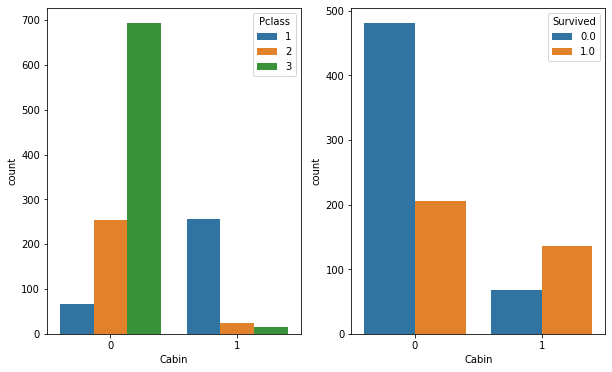

In [6]:
df_all.Cabin = df_all.Cabin.fillna(0)
for i in range(len(df_all.Cabin)): 
  if df_all.Cabin[i] != 0:
    df_all.Cabin[i] = 1
fig, axes = plt.subplots(1,2,figsize=(10,6))
sns.countplot(df_all.Cabin, hue=df_all.Pclass, ax= axes[0])
sns.countplot(df_all.Cabin, hue=df_all.Survived, ax= axes[1])
plt.show()

이것을 살펴보면, cabin 넘버가 더 높은 등급인 티켓과 관련성이 있는 것으로 보인다.
cabin 숫자가 기입되어 있는 사람들 대부분은 Pclass가 1등급인 사람들이었다(왼쪽 그림)
그리고 오른쪽 그림을 보면, cabin 숫자가 기입되지 않은 사람들의 대부분이 생존하지 못했다.
결론 ==> 이 cabin넘버의 기입 유무라는 변수를 분석에 가지고 가기로 하자.

<a id="222"></a>
### Embarked and Fare
Embarked와 Fare 변수는 단지 한두개의 결측값밖에 없었다.
따라서 우리는 Embarked의 결측값을 빈도가 가장 높았던 값으로 채워 넣고,
fare 변수의 결측값은 중위수로 채워 넣자.

In [8]:
 df_all.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [9]:
most_embarked = df_all.Embarked.value_counts().index[0]
df_all.Embarked = df_all.Embarked.fillna(most_embarked) #Embarked의 결측치를 가장 빈번했던 값으로 채워넣음
df_all.Fare = df_all.Fare.fillna(df_all.Fare.median()) #Fare의 결측치를 Fare의 Median 값으로 채워넣음


<a id="223"></a>
### Age
Age는 20% 정도가 결측값이었다. 나이는 중요한 변수임이 분명.
결측값을 평균이나 중위수로 채우거나, 좀 더 복잡하게 처리할 수 있다.

먼저 age 변수의 분포를 살펴보자.
아래 그림은 나이대별로 성별 생존 분포를 보여준다. 
분포는 거의 똑같은 것으로 보이는데, 그러나 여성이 대부분의 연령대에서 더 높은 생존율을 보임을 알 수 있다.

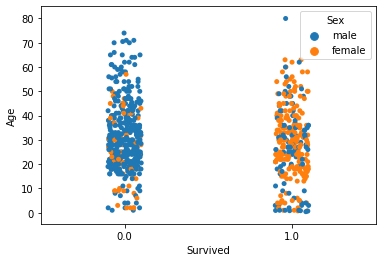

In [13]:
#여성과 남성 구분해서 stripplot 그려보기
sns.stripplot(data=df_all, x='Survived', y='Age', hue='Sex')

ValueError: cannot convert float NaN to integer

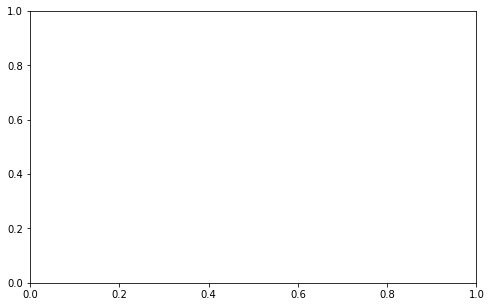

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(df_all["Age"], color='black')
plt.show()
print(df_all.Age.describe())
Age_cat = pd.cut(df_all.Age,bins=[0,10,20,30,40,50,60,70,80],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

fig, axes = plt.subplots(1,2, figsize = (10,6))
sns.countplot(Age_cat[(df_all.Sex=='female')],color= 'black',ax =axes[0])
sns.countplot(Age_cat[(df_all.Survived ==1) & (df_all.Sex=='female')],color='pink',ax =axes[0]).set_title('Female')
sns.countplot(Age_cat[(df_all.Sex=='male')],color= 'black',ax =axes[1])
sns.countplot(Age_cat[(df_all.Survived ==1) & (df_all.Sex=='male')],color='blue', ax =axes[1]).set_title('Male')
plt.show()

그렇다면 나이 변수를 성별, Pclass, Title과 연관지어서 보면 어떨까.
우리는 각 그룹에서 중위 연령이 다름을 알 수 있다.(아래)
예를 들어, Pclass 3인 Miss의 중위연령은 18살인데 반해, Pclass 1에 있는 남성 officer의 중위연령은 52살이다.
따라서, 모든 결측값을 단지 하나의 중위수로 채우는 대신, 각 사람을 그사람의 호칭, 성별, Pclass에 관련된 값으로 채우는 것이 더 좋을 것이다.

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

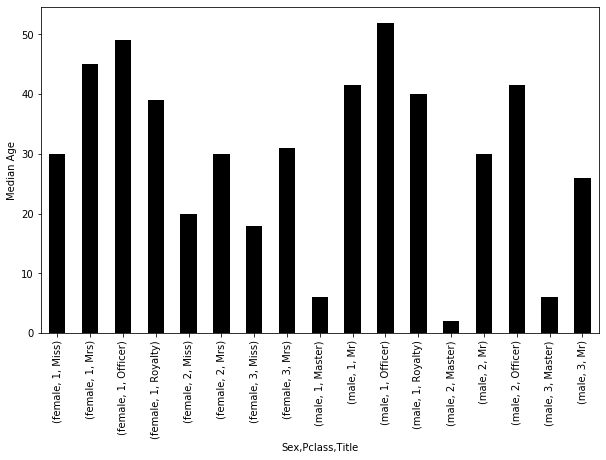

In [14]:
grouped = df_all.groupby(['Sex','Pclass', 'Title'])  
display(grouped.Age.median())
plt.figure(figsize= (10,6))
ax = grouped.Age.median().plot(kind='bar',color= 'black' )
ax.set(ylabel = 'Median Age')
plt.show()


In [15]:
df_all.Age = grouped.Age.apply(lambda x: x.fillna(x.median())) #df_all의 Age 컬럼의 결측치를 각 그룹의 중위수로 채운다.

이 시점에서 결측값들의 갯수를 한번 더 체크하자.

In [16]:
print('Number of missing values in',m, 'examples')
display(df_all.isnull().sum())

Number of missing values in 1309 examples


Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
dtype: int64

이제 우리 데이터셋에는 더이상 결측값이 없다. 
418개의 결측 survival은 test셋이기 때문이다.
Survival은 input이 아닌, target vector로 활용될 것이다.

<a id="23"></a>

## Exploring Some more features

우리는 모든 결측값을 채웠다. 
생존여부에 각 피처가 어떤 효과를 갖는지 먼저 살펴보자.

<a id="231"></a>
### Sex 성별

아래 그림을 통해 볼 때, 대부분의 여성은 생존한 반면, 대다수의 남성은 생존하지 못했음을 알 수 있다.

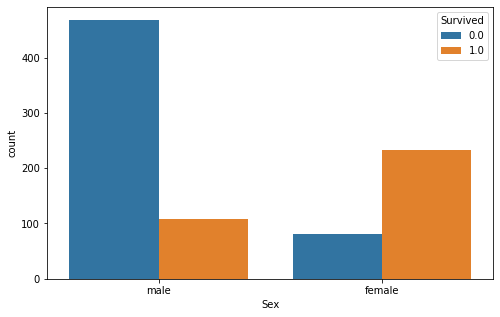

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Sex, hue=df_all.Survived)
plt.show()

<a id="232"></a>

### 티켓 등급 Ticket class (Pclass)

아래 그림을 통해, 3등급 티켓이었던 대부분의 사람들은 생존하지 못한 반면, 1등급 사람들은 많이 생존했음을 알 수 있다.

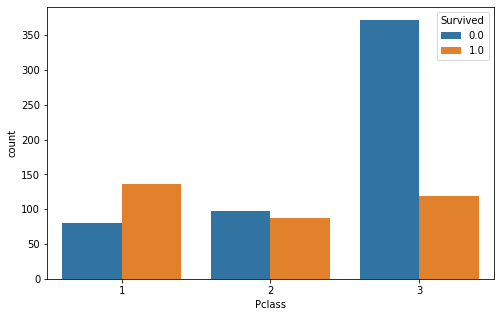

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Pclass, hue=df_all.Survived)
plt.show()

<a id="233"></a>

### 형제자매나 배우자의 수 Number of Siblings/Spouses

이 그림에서 생존율이 높았던 경우는 1명의 형제자매 또는 배우자가 승선했던 사람들임을 알 수 있다.

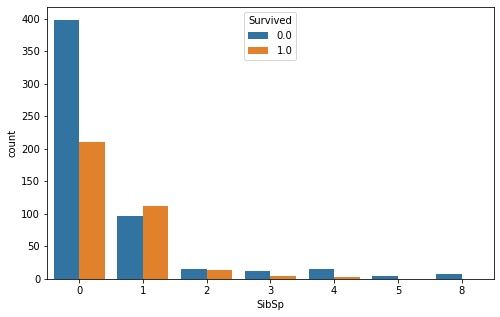

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.SibSp, hue=df_all.Survived)
plt.show()

<a id="234"></a>

### 부모와 자녀의 수 Number of Parents/Children

부모와 자녀의 수가 높은 경우 생존율이 더 높다. 이 결과는 위기 상황에도 누군가가 곁에 있다는 것이 나쁘지 않음을 의미!

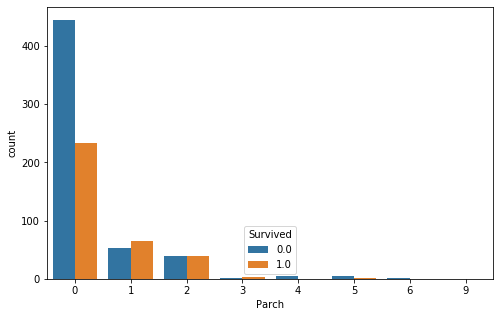

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Parch, hue=df_all.Survived)
plt.show()

<a id="234"></a>

### 호칭 Title

이를 통해 여성, 아이들, 왕족들을 구하다 많은 남성 신사들이 희생당했음을 추측할 수 있다.

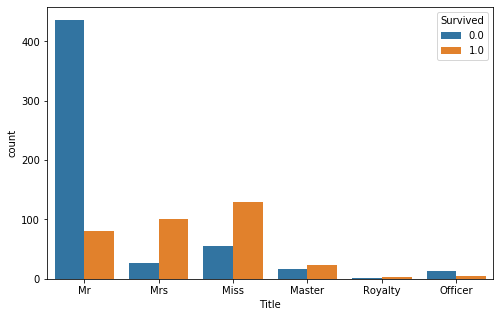

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Title, hue=df_all.Survived)
plt.show()

<a id="235"></a>


### 승선지 Embarked

승선지로 Cherbourg를 선택했던 사람들이 다른 포트에서 승선한 사람들에 비해 더 운이 좋았다.

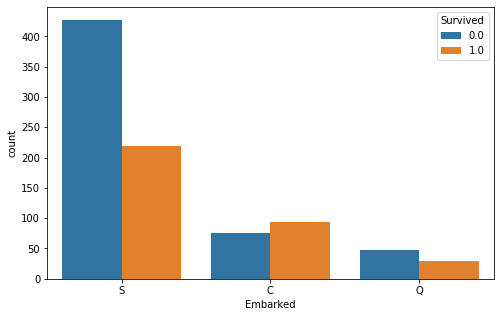

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Embarked, hue=df_all.Survived)
plt.show()

<a id="236"></a>
### 요금 Fare

요금을 여러 구간으로 나누어서 살펴보니, 더 많이 지불한 사람들이 더 많이 생존했다.

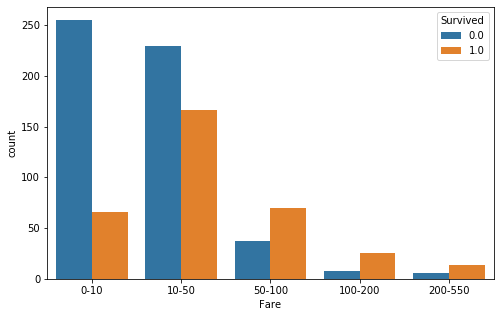

In [23]:
Fare_cat = pd.cut(df_all.Fare,bins=[0,10,50,100,200,550],labels=['0-10','10-50','50-100','100-200','200-550'])

plt.figure(figsize=(8,5))
sns.countplot(Fare_cat, hue=df_all.Survived)

plt.show()

<a id="237"></a>

### 티켓, 이름, 승객ID Ticket, Name, PassengerID

우리는 호칭 추출을 위해 이름을 활용했었지만, 이제는 이 3개의 피처들은 필요가 없으니 삭제하도록 한다.

In [24]:

df_all.drop('Name', axis =1, inplace=True)
df_all.drop('Ticket', axis =1, inplace=True)
df_all.drop('PassengerId', axis=1, inplace = True)
display(df_all)

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
0,22.0,0,S,7.2500,0,3,male,1,0.0,Mr
1,38.0,1,C,71.2833,0,1,female,1,1.0,Mrs
2,26.0,0,S,7.9250,0,3,female,0,1.0,Miss
3,35.0,1,S,53.1000,0,1,female,1,1.0,Mrs
4,35.0,0,S,8.0500,0,3,male,0,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,26.0,0,S,8.0500,0,3,male,0,NaN,Mr
1305,39.0,1,C,108.9000,0,1,female,0,NaN,Royalty
1306,38.5,0,S,7.2500,0,3,male,0,NaN,Mr
1307,26.0,0,S,8.0500,0,3,male,0,NaN,Mr


<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center> Training</center></h2>


자, 이제 본격적으로 학습을 시키기 전에, 데이터를 좀 더 보자. 
우리는 범주형 값들을 수치형으로 전환시킬 필요가 있다.
성별에 대해서는 0, 1 (남성 0, 여성 1)
Embarked와 Title에 대해서는 원핫인코딩을 활용하고, 
SibSp와 Parch 를 함께 사용해서 Partner(파트너)라는 새로운 피처를 만들자.

In [25]:
display(df_all.head())

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
0,22.0,0,S,7.2500,0,3,male,1,0.0,Mr
1,38.0,1,C,71.2833,0,1,female,1,1.0,Mrs
2,26.0,0,S,7.9250,0,3,female,0,1.0,Miss
3,35.0,1,S,53.1000,0,1,female,1,1.0,Mrs
4,35.0,0,S,8.0500,0,3,male,0,0.0,Mr


In [26]:
Sex = {"male": 0, "female":1} #male을 0으로, female을 1로
df_all["Sex"] = df_all.Sex.map(Sex)
df_all['Partner'] = df_all['SibSp'] + df_all['Parch'] # Partner라는 변수 생성
df_all.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_all = pd.get_dummies(df_all, columns = ['Title','Embarked']) #원핫인코딩
display(df_all.head()) #데이터셋 재확인

,Age,Cabin,Fare,Pclass,Sex,Survived,Partner,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,7.2500,3,0,0.0,1,0,0,1,0,0,0,0,0,1
1,38.0,1,71.2833,1,1,1.0,1,0,0,0,1,0,0,1,0,0
2,26.0,0,7.9250,3,1,1.0,0,0,1,0,0,0,0,0,0,1
3,35.0,1,53.1000,1,1,1.0,1,0,0,0,1,0,0,0,0,1
4,35.0,0,8.0500,3,0,0.0,0,0,0,1,0,0,0,0,0,1


<a id="31"></a>

## 분류기 정의 Defining our classifiers

<a id="311"></a>

### 로지스틱 회귀 (기초부터). Logistic Regression (from scratch)
One interpretation of binary Logistic Regression (LR) is that it learns the conditional distribution $P[Y = y | x]$ and then uses this model to estimate the Bayes classifier. In particular, LR assumes that 
\begin{equation*}
    P[Y = y | x, w] \approx \sigma(w^{T}x)  
\end{equation*}
where
\begin{equation*}
    \sigma(t) = \frac{1}{1 + e^{-t}}
\end{equation*}
is called the sigmoid or logistic function. We can see that $\sigma(w^{T}x) \in [0,1]$ and goes to 1 when $w^{T}x$ is large and 0 when $w^{T}x$ is small. The vector $w$ can be obtained using maximum likelihood estimation, i.e., minimizing the negative log-likelihood:
\begin{equation}
    \label{eq:lrML}
    J(w) = -\frac{1}{m} \sum_{i=1}^{m} y_{i} \log\left( \sigma(w^{T}x_{i}) \right) + (1-y_{i}) \log\left(1 - \sigma(w^{T}x_{i}) \right)
\end{equation}


In [27]:
# Logistic Regression from scratch

def logistic_regression(X, y, alpha=1e-3, num_iter=30,random_state=42):
    
    np.random.seed(random_state) # Random_state
    d, m = X.shape 
    K = np.max(y) + 1
    w = np.random.randn(d, K)
    
    def softmax(x):
        s = np.exp(x) / np.sum(np.exp(x))
        return s
    
    def one_hot(y, k):  
        y_one_hot = np.eye(k)[y]
        return y_one_hot
    
    def h(x, w):
        p = softmax(w.T @ x)     #Using softmax for multiclass classification
        return p
    
    def cost(pred, y):
        c = np.sum(- one_hot(y, K).T * np.log(pred))
        return c

    def grad(w, x, y):
        Y = one_hot(y, K).T
        b = h(x, w) - Y
        b = np.reshape(b, (-1, 1))
        x = x.reshape(-1, 1)
        g = x @ np.reshape(b, (-1, 1)).T
        return g

    for i in range(num_iter):
        id = np.random.permutation(m)
        for j in id:
            gradient = grad(w, X[:, j], y[j])
            w -= alpha * gradient
    return w


<a id="312"></a>

### Least Square Ridge Classifier (from scratch)

Considering $X \in R^{m \times d}$ and  $Y \in R^{m \times K}$ ($m$ is number of training examples, $d$ is the feature size, and $K$ is the number of target classes), there is a closed-form solution:
        \begin{equation*}
            J(w) = \lVert{X{w} - Y}\rVert_{2}^{2}+ \lambda \lVert{w}\rVert_{F}^{2}
        \end{equation*}
        \begin{equation*}
           = (X{w}  - Y)^T(X{w} -Y) + \lambda{w^T{w}}
        \end{equation*}
        \begin{equation*}
           = (w^{T}X^{T} - Y^T)(X{w} -Y) + \lambda{w^T{w}}
        \end{equation*}
        \begin{equation*}
           = w^{T}X^{T}X{w}-w^{T}X^{T}{Y}-Y^{T}{X}{w} +Y^{T}Y + \lambda{w^T{w}}
        \end{equation*}
To minimize: $ \frac{\partial J}{\partial w} = 0$
        \begin{equation*}
           \frac{\partial J}{\partial w} = 2X^{T}Xw-2X^{T}Y+2\lambda{w} = 0 \rightarrow 2(X^{T}X+\lambda{I})w=2X^{T}Y
        \end{equation*}
        \begin{equation*}
        \Rightarrow w = (X^{T}X+\lambda{I})^{-1}X^{T}Y
        \end{equation*}
  

In [28]:
# Least square ridge classifier
def ridge_classifier(X, y, lambd=1e-4):
    d, m = X.shape
    k = np.max(y) + 1
    w = np.linalg.inv(X @ X.T + lambd * np.eye(d)) @ X @ np.eye(k)[y]
    return w

In [29]:
def error(X, y, w):
    m = np.shape(y)
    y_pred = w.T @ X
    y_pred = np.argmax(y_pred, axis=0)
    err = np.sum(y_pred == y) / m
    return err

<a id="313"></a>

### 전처리 Preprocess

최종 피처들을 반복 시도를 통해 결정했다. 
다음 단계로 우리는 피쳐들을 0과 1 사이의 범위로 표준화했다.(MinMax) 

In [30]:
mms = MinMaxScaler()

X = df_all.drop('Survived', axis=1).iloc[:891].values
y = (df_all["Survived"].iloc[:891].values).astype(int)
X = mms.fit_transform(X)
X_test = df_all.drop('Survived', axis=1).iloc[891:].values
X_test = mms.fit_transform (X_test)

<a id="314"></a>

### 학습 및 검증 (KFold): Train and validate (KFold)

KFold는 교차검증 수행에 적절한 방법이다.
우리는 5겹 교차검증을 사용하여 4개 파트로는 트레이닝을 하고 나머지 1개 파트로 테스팅을 진행했다.

In [31]:
scores_lr = []
scores_ls = []
fold =1

for tr, val in KFold(n_splits=5, random_state=42).split(X,y):
    X_train = X[tr]
    X_val = X[val]
    y_train = y[tr]
    y_val = y[val]
    best_W_LR = logistic_regression(X_train.T, y_train, alpha=1e-3, num_iter=300,random_state=42)
    val_acc_LR = error(X_val.T, y_val, best_W_LR)
    scores_lr.append(val_acc_LR)
    print(f'Validation acc LR: Fold {fold}:', val_acc_LR)
    W_LS = ridge_classifier(X_train.T, y_train, lambd=1e-4)
    val_acc_LS = error(X_val.T, y_val, W_LS)
    scores_ls.append(val_acc_LS)
    print(f'Validation acc LS: Fold {fold}:', val_acc_LS)
    fold +=1 

print('-------------------------------')
print("Accuracy Logistic Regression: %0.2f (+/- %0.2f)" % (np.mean(scores_lr), np.std(scores_lr) * 2))
print("Accuracy Least Squares Ridge: %0.2f (+/- %0.2f)" % (np.mean(scores_ls), np.std(scores_ls) * 2))



Validation acc LR: Fold 1: [0.84916201]
Validation acc LS: Fold 1: [0.81564246]
Validation acc LR: Fold 2: [0.83707865]
Validation acc LS: Fold 2: [0.83146067]
Validation acc LR: Fold 3: [0.80898876]
Validation acc LS: Fold 3: [0.80898876]
Validation acc LR: Fold 4: [0.79213483]
Validation acc LS: Fold 4: [0.79213483]
Validation acc LR: Fold 5: [0.88764045]
Validation acc LS: Fold 5: [0.89325843]
-------------------------------
Accuracy Logistic Regression: 0.84 (+/- 0.07)
Accuracy Least Squares Ridge: 0.83 (+/- 0.07)


In [32]:
# 테스트셋으로 릿지 분류예측 Ridge Classifier prediction on test set

y_preds_LS =  (np.argmax(W_LS.T @ X_test.T, axis=0)).astype(int)
df_sample_sub.loc[:, 'Survived'] = y_preds_LS
df_sample_sub.to_csv('submission0.csv', index=False)
display(df_sample_sub.head())
# LB score: 0.77033

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


평균적으로, 로지스틱 회귀와 최소제곱 릿지 분류기는 95%신뢰수준에서 83%, 82%의 정확도를 보였다.

<a id="32"></a>

## Scikit-learn models

Let's try sklearn built-in classifiers. We will use Logistic Regression (LR), RandomForest(RF), XGBoost(XGB) and Support vector machine (SVC). In this step, we are not using any hyperparameter tuning.

In [ ]:
def test_clfs(clfs):
    for clf in clfs:
        print('------------------------------------------')
        start = time()
        clf = clf(random_state=42)
        scores = cross_val_score(clf, X, y, cv=5)
        print(str(clf), 'results:')
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        end = time()
        print('Processing time', end-start,'s')
    

models = [RandomForestClassifier, LogisticRegression,XGBClassifier]
test_clfs(models)


We can see they have almost the same accuracy as our defined classifiers. Please note the processing times too. It may be important in performing hyperparameter search.

<a id="321"></a>

### Hyperparamater tuning

We will search for hyperparameteres using gridsearch method of sklearn. We will search for the three models of LR and RF and XGB. I have done the search and commented the best results, in order to not run this cell again. You can uncomment and perform the search with other hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# C = np.arange(1,100,1)
# fit_intercept = [True, False]
# penalty = ['l1', 'l2', 'elasticnet','none']
# class_weight = ['None', 'balanced']
# solver = ['newton-cg','lbfgs','liblinear','sag', 'saga']
# params = dict(C=C, fit_intercept=fit_intercept, penalty=penalty,
#               class_weight=class_weight, solver=solver)

# clf = GridSearchCV(estimator=LogisticRegression(random_state=42, n_jobs=-1) 
#                    , param_grid=params, cv=5, n_jobs=-1, verbose=2)

# clf.fit(X, y)
# print('best params', clf.best_params_)
# print('best score', clf.best_score_)
# best params {'C': 5, 'class_weight': 'None', 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}
# best score 0.8349946644906158



# n_estimators =[4,5,6,7,8,9,10,11,12,13,14,15]
# min_samples_split =[2, 3, 4, 5]
# min_samples_leaf =[1, 2, 3, 4, 5]
# max_depth =[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# params = dict(n_estimators=n_estimators, min_samples_split=min_samples_split,
#                min_samples_leaf=min_samples_leaf, max_depth=max_depth)

# clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1), param_grid=params, cv=5, n_jobs=-1, verbose=0)
# clf.fit(X, y)
# print('best params', clf.best_params_)
# print('best score', clf.best_score_)

#best params {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 9}
#best score 0.8372544096415794


# n_estimators = [10, 50,100,150]
# max_depth = [3, 5, 7, 9, 11]
# booster= ['gbtree','gblinear']
# min_child_weight = [1, 5, 10]
# gamma= [0.5, 1, 2, 5]
# subsample= [0.6, 0.8, 1.0]
# colsample_bytree = [0.6, 0.8, 1.0]
# params = dict(n_estimators=n_estimators,
#                min_child_weight=min_child_weight, max_depth=max_depth,booster=booster,gamma=gamma,
#            subsample=subsample, colsample_bytree=colsample_bytree )

# clf = GridSearchCV(estimator=XGBClassifier(random_state=42, n_jobs=-1), param_grid=params, cv=5, n_jobs=-1, verbose=2)
# clf.fit(X, y)
# print('best params', clf.best_params_)
# print('best score', clf.best_score_)
#best params {'booster': 'gbtree', 'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
#best score 0.8451321323206328

<a id="322"></a>
### Random Forest Classifier

In [ ]:
clf1 = RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=2,
                             n_estimators=9, random_state=42, n_jobs=-1) # The parameters came from the former cell results.
clf1.fit(X, y)


y_preds_RF = clf1.predict(X_test).astype(int)

df_sample_sub.loc[:, 'Survived'] = y_preds_RF
df_sample_sub.to_csv('submission1.csv', index=False)
display(df_sample_sub.head())



<a id="323"></a>
### Logistic Regression Classifier

In [ ]:
clf2 = LogisticRegression(C=48, class_weight='None', fit_intercept= False, penalty='l2', solver='lbfgs')
clf2.fit(X, y)

y_preds_LR = clf2.predict(X_test).astype(int)

df_sample_sub.loc[:, 'Survived'] = y_preds_LR
df_sample_sub.to_csv('submission2.csv', index=False)
display(df_sample_sub.head())


<a id="324"></a>
### XGBoost Classifier

In [ ]:
clf3 = XGBClassifier(booster='gbtree', colsample_bytree= 0.6,
                    gamma=1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8)

clf3.fit(X, y)
y_preds_xgb = clf3.predict(X_test).astype(int)

df_sample_sub.loc[:, 'Survived'] = y_preds_xgb
df_sample_sub.to_csv('submission3.csv', index=False)
display(df_sample_sub.head())


<a id="33"></a>

## Deep Neural Network (Keras)

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K
def create_model(hid_layers ,dropout_rate, lr):
    
    inp1 = tf.keras.layers.Input(shape = (X.shape[1], ))
    x1 = tf.keras.layers.BatchNormalization()(inp1)
    
    for i, units in enumerate(hid_layers):
        x1 = tf.keras.layers.Dense(units, activation='relu')(x1)
        x1 = tf.keras.layers.Dropout(dropout_rate)(x1)    
    x1 = tf.keras.layers.Dense(1, activation='sigmoid')(x1)
    
    model = tf.keras.models.Model(inputs= inp1, outputs= x1)
    
    model.compile(optimizer ="adam", loss='binary_crossentropy', metrics='accuracy')
    
    return model 
    
    
lr=1e-5
hid_layers = [256, 256]
dr = 0.5
model = create_model(hid_layers, dr, lr)

tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names= False,
                          rankdir = 'TB', expand_nested = True)



In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
df_sub_copy = df_sample_sub.copy()
df_sub_copy.loc[:, 'Survived'] = 0.0


scores=[]
fold = 0
for tr, val in KFold(n_splits=5, random_state=42).split(X,y):
    X_train = X[tr]
    X_val = X[val]
    y_train = y[tr]
    y_val = y[val]
    rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 0, 
                                min_delta = 1e-4, min_lr = 1e-6, mode = 'min')
        
    ckp = ModelCheckpoint(f'bests_weights.hdf5', monitor = 'val_loss', verbose = 0, 
                              save_best_only = True, save_weights_only = True, mode = 'min')
        
    es = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, patience = 15, mode = 'min', 
                           baseline = None, restore_best_weights = True, verbose = 0)
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[rlr,ckp,es],
                        epochs=300, verbose=0)
    scores.append(np.max(history.history['val_accuracy']))
        
    model.load_weights(f'bests_weights.hdf5')
    y_preds_nn = model.predict(X_test)
    df_sub_copy.loc[:, 'Survived'] += y_preds_nn.reshape(-1)
    print(f'fold',str(fold)+':',scores[fold])
    K.clear_session()
    fold+=1
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

In [ ]:
# NN submission
df_sample_sub.loc[:, 'Survived'] = (np.round(df_sub_copy.loc[:,'Survived']/ 5)).astype(int)
display(df_sample_sub.head())
df_sample_sub.to_csv('submission4.csv', index=False)


<a id="34"></a>
## Voting Classifier

Here we ask our 5 classifiers to vote for every passenger. The result is probably better than single models.

In [ ]:
sub0= pd.read_csv('submission0.csv')
sub1 = pd.read_csv('submission1.csv')
sub2 = pd.read_csv('submission2.csv')
sub3 = pd.read_csv('submission3.csv')
sub4 = pd.read_csv('submission4.csv')

sub_vot = np.round((sub0['Survived']+sub1['Survived']+sub2['Survived']+sub3['Survived']+sub4['Survived'])/5).astype(int)
df_sample_sub.loc[:, 'Survived'] = sub_vot
df_sample_sub.to_csv('submission5.csv', index=False)
display(df_sample_sub.head())

<a id="4"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center>Summary</center></h2>

In this project, we first performed explanatory data analysis and investigated each feature individually. We engineered two new features out of names and cabin. We filled the missing values based on a reasonable approach. For example, age is filled with median of each group based on their P-class, Sex and Title. After cleaning the dataset, we normalized the data to be in a range of (0,1) and then implemented two machine learning models, Logistic Regression and Ridge classifier, from scratch. We then implemented Logistic Regression, Random Forest and XGBoost using scikit-learn library and a deep neural network using Keras on Tensorflow. We used hyperparameter tuning to find the best parameters for our models, and used KFold cross validation technique. At last, we used a voting classifier to take into account each classifier's output. Please note that different models or feature engineering may result in better outcome.<font size="4"> 
    <b> Please upvote this kernel if it was useful :) </b></font>